# WebScrapping projet final

Sujet : Etude comparative entre les restaurants qui respectent la saison des fruits et légumes et ceux qui ne la respectent pas

Groupe : Alexandre SMADJA, Aurélie MARTIN, Adèle MONTOYA

# Analyse et exploitation de nos données

### 1) Imporation de nos données

In [1]:
import pandas as pd

file_path = 'D:\\ESILV5\\Webscrapping\\Projet\\restaurants.csv'
df = pd.read_csv(file_path)
print(df.head())

                          Restaurant_Name  rating      priceRange  \
0                         Sacré Frenchy !     4.5  De 31 € à 50 €   
1                        L'Empire du 8ème     4.6  De 31 € à 50 €   
2  Restaurant Market By Chef Jean Georges     4.6  De 31 € à 50 €   
3                 Le Replat de Montmartre     4.6   30 € ou moins   
4                             Pamela Popo     4.8    51 € et plus   

                  typeCuisine  \
0  Française - Traditionnelle   
1                   Française   
2                   Française   
3                  Européenne   
4                   Française   

                                          Menu Items  ville  fruit_score  \
0  ['accompanied', 'on', 'jb', 'chef', 'des', 'me...  Paris     0.560000   
1  ['accompanied', 'sauteed', 'on', 'beefsteak', ...  Paris     0.250000   
2  ['roll', 'fondue', 'sauce', 'herbs', 'ice', 'j...  Paris     0.250000   
3  ['sage', 'sauce', 'ice', 'fish', 'belle', 'thr...  Paris     0.500000   
4  ['d

In [2]:
#unifier la colonnes des prixs (mettre en euros)
def convert_price_range(value):
    if value == '25 £ ou moins':
        return '30 € ou moins'
    elif value == 'De 26 £ à 40 £':
        return 'De 31 € à 50 €'
    elif value == '41 £ et plus':
        return '51 € et plus'
    else:
        return value 

df['priceRange'] = df['priceRange'].apply(convert_price_range)

### 2) Analyse sur les prix 

In [3]:
import pandas as pd

def analyse_restaurants(df):
    # seuil pour les scores de fruits et légumes
    SEUIL = 0.4

    # créer une catégorie pour savoir si on utilise ou non des produits saisonniers
    df['Utilise_saisonnier'] = (df['fruit_score'] > SEUIL) & (df['legume_score'] > SEUIL)

    #fourchette de prix
    prix_saisonnier = df[df['Utilise_saisonnier']]['priceRange'].value_counts()
    prix_non_saisonnier = df[~df['Utilise_saisonnier']]['priceRange'].value_counts()

    resultats = {
        'Fourchette de prix (Saisonnier)': prix_saisonnier,
        'Fourchette de prix (Non Saisonnier)': prix_non_saisonnier,}
    
    return resultats

resultats_analyse = analyse_restaurants(df)
for key, value in resultats_analyse.items():
    print(f"{key}:\n{value}\n")


Fourchette de prix (Saisonnier):
30 € ou moins     103
De 31 € à 50 €     74
51 € et plus       18
Name: priceRange, dtype: int64

Fourchette de prix (Non Saisonnier):
30 € ou moins     192
De 31 € à 50 €    169
51 € et plus      107
Name: priceRange, dtype: int64



In [4]:
# Avoir la corrélation entre le prix et le respect de la saison
def convert_price_range_to_numeric(price_range):
    if '30 € ou moins' in price_range:
        return 15  
    elif '51 € et plus' in price_range:
        return 75  
    elif 'De 31 € à 50 €' in price_range:
        return 40
    else:
        return 0  

# convertir en numéric la colonne priceRange en créant priceRange_numeric
df['priceRange_numeric'] = df['priceRange'].apply(convert_price_range_to_numeric)

# définir un sueil
SEASONAL_THRESHOLD = 0.4

# créer une catégorie : si lle score est inférieur au score alors "pas de saison", si cest superieur on dit quil respcte la saison
df['Utilise_saisonnier'] = (df['fruit_score'] > SEASONAL_THRESHOLD) & (df['legume_score'] > SEASONAL_THRESHOLD)

# calculer la corrélation
correlation = df[['Utilise_saisonnier', 'priceRange_numeric']].corr().iloc[0,1]

correlation


-0.15914137836958903

###  3) Analyse sur le type de cuisine 

In [5]:
import ast

# convertir la chaîne de caractères en liste
def str_to_list(chaine):
    try:
        chaine = chaine.replace("'", "\"")
        return ast.literal_eval(chaine)
    except (ValueError, SyntaxError):
        return [chaine] if chaine else []
    
df['typeCuisine'] = df['typeCuisine'].apply(str_to_list)

# on "aplati" la liste des types de cuisine et on compte le nb
type_cuisine_aplati = df.explode('typeCuisine')
cuisine_counts_saisonnier = type_cuisine_aplati[type_cuisine_aplati['Utilise_saisonnier']]['typeCuisine'].value_counts()
cuisine_counts_non_saisonnier = type_cuisine_aplati[~type_cuisine_aplati['Utilise_saisonnier']]['typeCuisine'].value_counts()

# que ceux avec plus de 10 resto (sinon trop longs)
cuisine_counts_saisonnier_filtered = cuisine_counts_saisonnier[cuisine_counts_saisonnier > 10]
cuisine_counts_non_saisonnier_filtered = cuisine_counts_non_saisonnier[cuisine_counts_non_saisonnier > 10]

print('Répartition des restaurants non saisonniers selon leur type (plus de 10 restaurants) :\n', cuisine_counts_non_saisonnier_filtered)
print('\nRépartition des restaurants saisonniers selon leur type (plus de 10 restaurants) :\n', cuisine_counts_saisonnier_filtered)

Répartition des restaurants non saisonniers selon leur type (plus de 10 restaurants) :
 Italienne             62
Française             34
Grillade              31
Britannique           29
Européenne Moderne    23
Indienne              21
Méditerranée          20
Japonaise             15
Écossaise             15
Chinoise              14
Fruits de mer         14
Tapas/Amuse-Gueule    13
Espagnole             12
Thaï                  12
Name: typeCuisine, dtype: int64

Répartition des restaurants saisonniers selon leur type (plus de 10 restaurants) :
 Française                                38
Italienne                                16
Britannique                              15
Américaine                               14
Réservation de tables avec bouteilles    11
Name: typeCuisine, dtype: int64


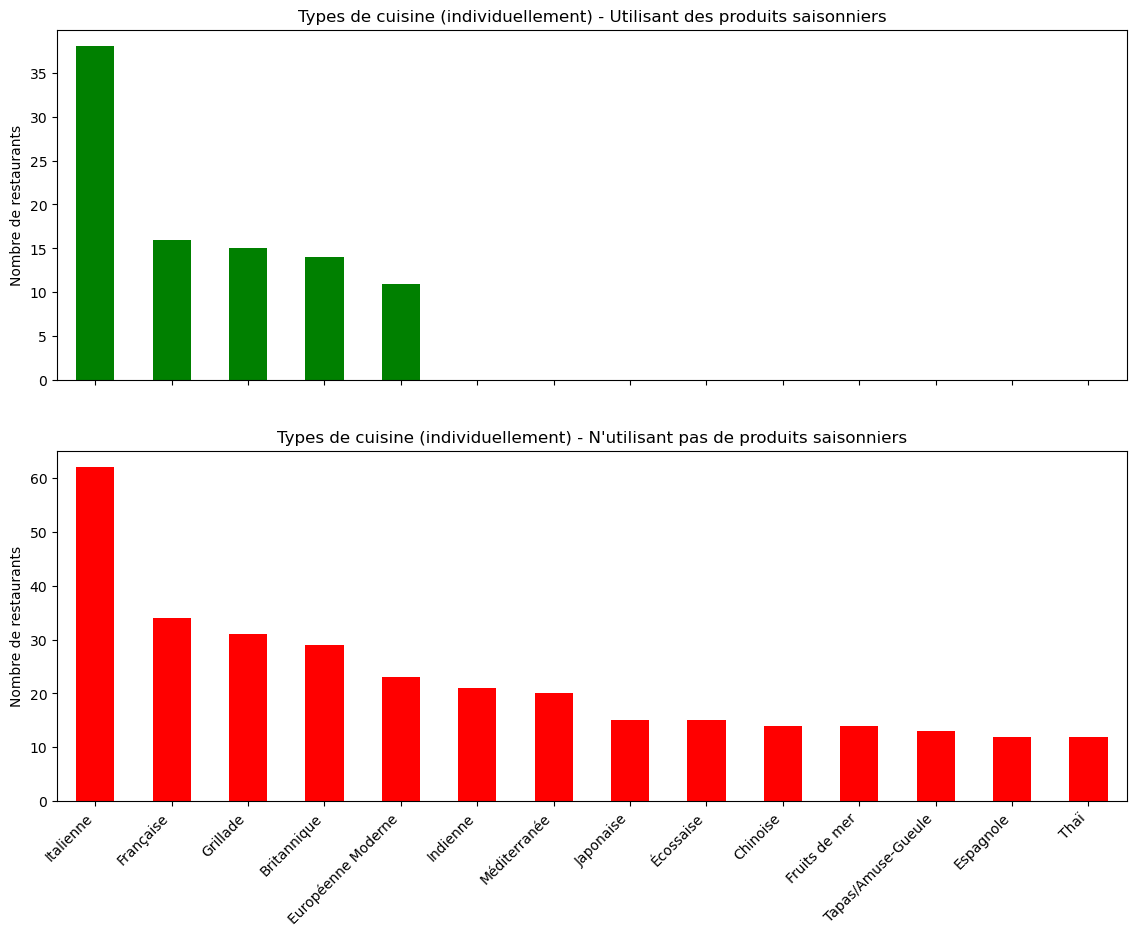

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# restos saisonniers
cuisine_counts_saisonnier_filtered.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Types de cuisine (individuellement) - Utilisant des produits saisonniers')
axes[0].set_ylabel('Nombre de restaurants')

# restos non saisonniers
cuisine_counts_non_saisonnier_filtered.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Types de cuisine (individuellement) - N\'utilisant pas de produits saisonniers')
axes[1].set_ylabel('Nombre de restaurants')

plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)
plt.show()


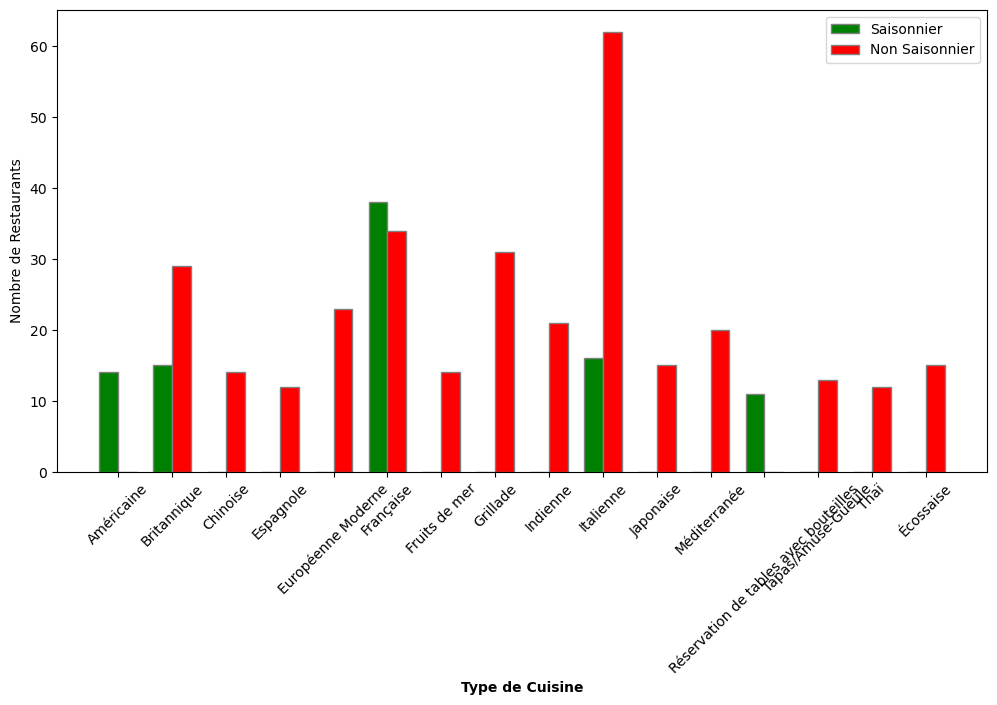

In [8]:
import numpy as np
# Obtenir une liste combinée de tous les types de cuisine uniques des deux séries
all_types = set(cuisine_counts_saisonnier_filtered.index).union(set(cuisine_counts_non_saisonnier_filtered.index))

# Créer des DataFrames avec tous les types et remplir les valeurs manquantes par 0
df_saisonnier = cuisine_counts_saisonnier_filtered.reindex(all_types).fillna(0)
df_non_saisonnier = cuisine_counts_non_saisonnier_filtered.reindex(all_types).fillna(0)

# Tri par index pour s'assurer que les deux DataFrames sont dans le même ordre
df_saisonnier = df_saisonnier.sort_index()
df_non_saisonnier = df_non_saisonnier.sort_index()

# Utilisation de ces DataFrames pour le tracé
barWidth = 0.35
r1 = np.arange(len(df_saisonnier))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, df_saisonnier, color='green', width=barWidth, edgecolor='grey', label='Saisonnier')
plt.bar(r2, df_non_saisonnier, color='red', width=barWidth, edgecolor='grey', label='Non Saisonnier')

plt.xlabel('Type de Cuisine', fontweight='bold')
plt.ylabel('Nombre de Restaurants')
plt.xticks([r + barWidth/2 for r in range(len(df_saisonnier))], df_saisonnier.index, rotation=45)

plt.legend()
plt.show()



In [9]:
# test du chi-carré pour la corrélation
from scipy.stats import chi2_contingency

# faire tableau de contingence
tableau_contingence = pd.crosstab(type_cuisine_aplati['typeCuisine'], type_cuisine_aplati['Utilise_saisonnier'])

chi2, p, dof, expected = chi2_contingency(tableau_contingence)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

Chi2 Statistic: 190.83617456294132, p-value: 7.528131588506758e-12


In [10]:
# les 2 types de cuisine qui respectent le plus la saison des fruits et légume 
proportion_saisonnier_par_cuisine = type_cuisine_aplati.groupby('typeCuisine')['Utilise_saisonnier'].count()
top_cuisines_saisonnieres = proportion_saisonnier_par_cuisine.sort_values(ascending=False).head(2)
print(top_cuisines_saisonnieres)


typeCuisine
Italienne    78
Française    72
Name: Utilise_saisonnier, dtype: int64


### 4) Satisfaction du consommateur

In [11]:
def analyse_restaurants2(df):

    #note moyenn
    note_moyenne_saisonnier = df[df['Utilise_saisonnier']]['rating'].mean()
    note_moyenne_non_saisonnier = df[~df['Utilise_saisonnier']]['rating'].mean()

    resultats = {
        'Note moyenne (Saisonnier)': note_moyenne_saisonnier,
        'Note moyenne (Non Saisonnier)': note_moyenne_non_saisonnier}
    
    return resultats

resultats_analyse2 = analyse_restaurants2(df)
for key, value in resultats_analyse2.items():
    print(f"{key}:\n{value}\n")

Note moyenne (Saisonnier):
4.309844559585492

Note moyenne (Non Saisonnier):
4.381505376344085



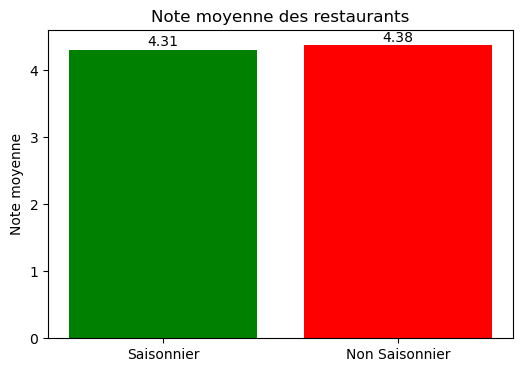

In [12]:
plt.figure(figsize=(6, 4))
notes = [resultats_analyse2['Note moyenne (Saisonnier)'], resultats_analyse2['Note moyenne (Non Saisonnier)']]
labels = ['Saisonnier', 'Non Saisonnier']
plt.bar(labels, notes, color=['green', 'red'])
plt.title('Note moyenne des restaurants')
plt.ylabel('Note moyenne')
for i, v in enumerate(notes):
    plt.text(i, v + 0.05, "{:.2f}".format(v), ha='center')

plt.show()

In [13]:
# corrélation entre le prix et la satisfaction globale
correlation_rating_price = df[['rating', 'priceRange_numeric']].corr().iloc[0,1]
print(correlation_rating_price)

0.1425593931790356


In [14]:
# corrélation entre la satisfaction globale (score donné par le rating) et le respect de la saisons
correlation_rating_saisonnier = df[['rating', 'Utilise_saisonnier']].corr().iloc[0,1]
print(correlation_rating_saisonnier)

-0.08562449798191711


### 5) Diversité des plats 

In [15]:
# corrélation entre le prix et la diversité des plats
df['menu_length'] = df['Menu Items'].apply(lambda x: len(x))

correlation_diversity_price = df[['menu_length', 'priceRange_numeric']].corr().iloc[0,1]
correlation_diversity_price

-0.005419118919542399

La corrélation calculée entre la longueur du menu (comme proxy de la diversité) et la fourchette de prix numérique des menus est d'environ 0.16. Cette valeur indique une faible corrélation positive entre la longueur du menu et le prix des menus. Cela signifie que dans cet ensemble de données, une augmentation de la diversité du menu est légèrement associée à une augmentation du prix des menus, mais la relation n'est pas fortement prononcée

In [16]:
# corrélation entre la diversité des plats (longueur du menu) et l'utilisation de produits de saisons
correlation_diversite_saisonnier = df[['menu_length', 'Utilise_saisonnier']].corr().iloc[0,1]
print(correlation_diversite_saisonnier)

0.07325598252232635


### 6) Zone géographique

La corrélation entre des identifiants de ville et une variable booléenne n'a pas forcément de signification concrète en termes d'analyse statistique, car la représentation numérique des villes n'a pas d'ordre ou de distance significative qui pourrait être interprétée en termes de corrélation.

In [17]:
#Test du chi-carré de Pearson
import pandas as pd
from scipy.stats import chi2_contingency

# Créer un tableau de contingence
tableau_contingence = pd.crosstab(df['ville'], df['Utilise_saisonnier'])

# Effectuer le test du chi-carré
chi2, p, dof, expected = chi2_contingency(tableau_contingence)

print(f"Chi2 Statistic: {chi2}, p-value: {p}")


Chi2 Statistic: 29.730900034650034, p-value: 4.421949945086583e-05


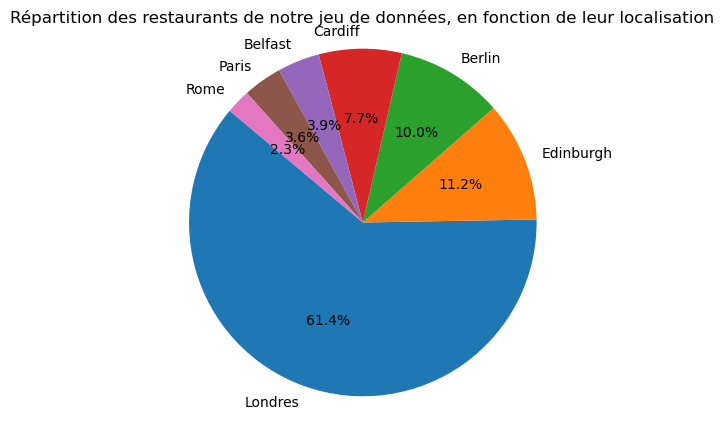

In [18]:
#graphique camembert pour la répartition des restos en fonction des villes

# Comptage du nombre d'occurrences de chaque ville
nombre_villes = df['ville'].value_counts()

# Création du graphique camembert
plt.figure(figsize=(6, 5))
plt.pie(nombre_villes, labels=nombre_villes.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des restaurants de notre jeu de données, en fonction de leur localisation')
plt.axis('equal')

plt.show()


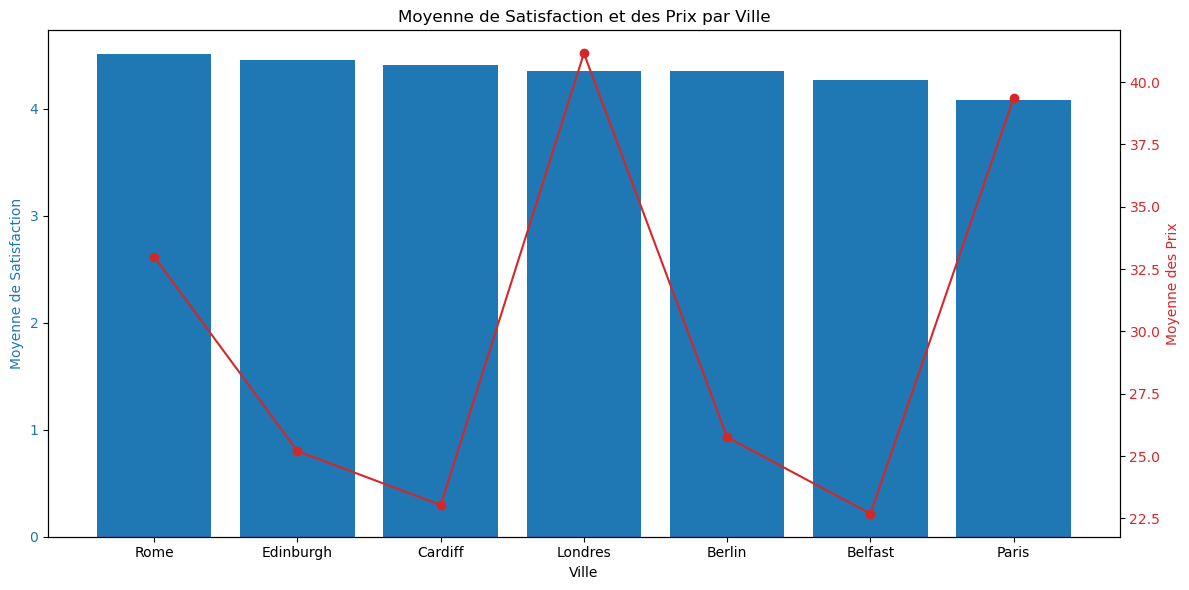

In [19]:
# Calculer la moyenne de satisfaction et la moyenne des prix pour chaque ville
ville_moyennes = df.groupby('ville').agg({
    'rating': 'mean',
    'priceRange_numeric': 'mean'
}).reset_index()

# Trier les villes par la moyenne de satisfaction ou de prix si désiré
ville_moyennes = ville_moyennes.sort_values(by='rating', ascending=False)

# Créer une figure et un graphique à barres pour les prix
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Ville')
ax1.set_ylabel('Moyenne de Satisfaction', color=color)
ax1.bar(ville_moyennes['ville'], ville_moyennes['rating'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# axe numeor 2 : moyenne des prix
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Moyenne des Prix', color=color)
ax2.plot(ville_moyennes['ville'], ville_moyennes['priceRange_numeric'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Moyenne de Satisfaction et des Prix par Ville')

# Afficher le graphique
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


In [20]:
#créer la colonne coordonnées des villes
coordonnees_villes = {
    'Paris': (48.8566, 2.3522),
    'Rome': (41.9028, 12.4964),
    'Londres': (51.5074, -0.1278),
    'Berlin': (52.5200, 13.4050),
    'Cardiff': (51.4816, -3.1791),
    'Edinburgh': (55.9533, -3.1883),
    'Belfast': (54.5973, -5.9301)
}


def get_coordonnees(ville):
    return coordonnees_villes.get(ville, (None, None))

df['coordonnees'] = df['ville'].apply(get_coordonnees)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


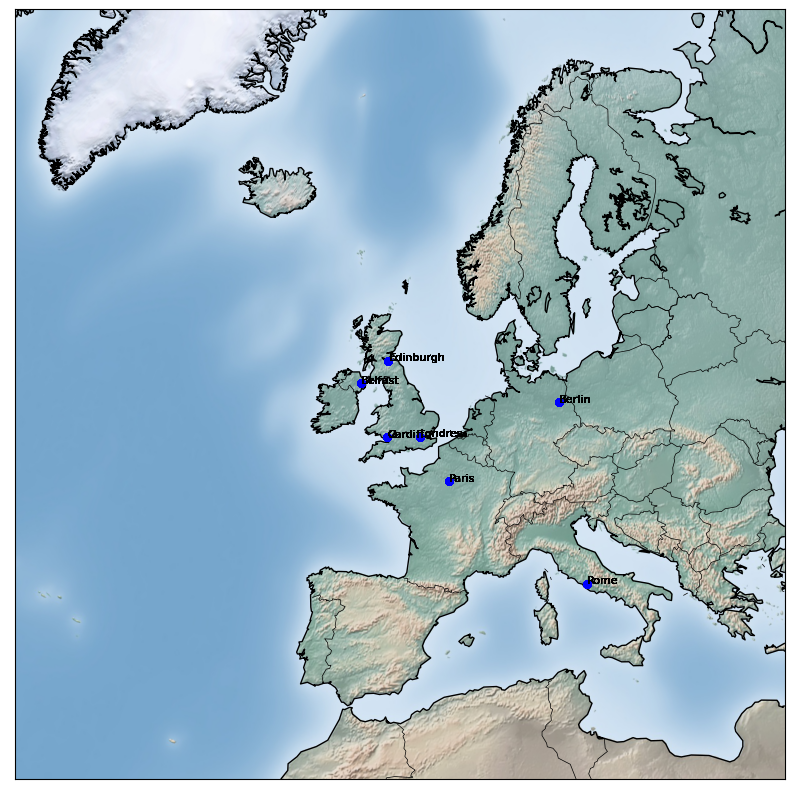

In [21]:
#pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# création de la carte
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='l', lat_0=54, lon_0=-2, width=5E6, height=5E6)
m.shadedrelief()
m.drawcoastlines()
m.drawcountries()

# ajouter des points pour chaque ville en utilisant la colonne 'coordonnees'
for index, row in df.iterrows():
    ville = row['ville']
    coordonnees = row['coordonnees']
    if coordonnees[0] is not None and coordonnees[1] is not None:
        x, y = m(coordonnees[1], coordonnees[0])
        m.plot(x, y, 'bo', markersize=5)
        plt.text(x, y, ville, fontsize=8)

plt.show()

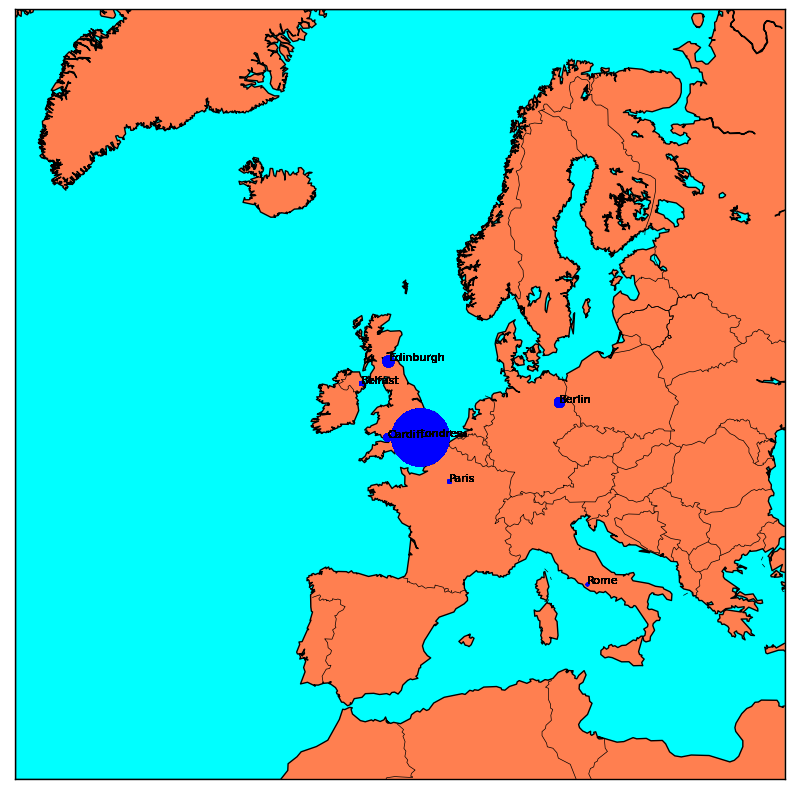

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Compter les occurrences de chaque ville
occurrences_ville = df['ville'].value_counts()

# Création de la carte
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='l', lat_0=54, lon_0=-2, width=5E6, height=5E6)
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral', lake_color='aqua')
m.drawcoastlines()
m.drawcountries()

# Ajouter des points pour chaque ville
for ville, coordonnees in zip(df['ville'], df['coordonnees']):
    if coordonnees[0] is not None and coordonnees[1] is not None:
        x, y = m(coordonnees[1], coordonnees[0])
        taille_point = occurrences_ville[ville] * 0.1
        m.plot(x, y, 'bo', markersize=taille_point)
        plt.text(x, y, ville, fontsize=8)

plt.show()


In [23]:
df

,Restaurant_Name,rating,priceRange,typeCuisine,Menu Items,ville,fruit_score,legume_score,cereale_score,Utilise_saisonnier,priceRange_numeric,menu_length,coordonnees
0,Sacré Frenchy !,4.5,De 31 € à 50 €,[Française - Traditionnelle],"['accompanied', 'on', 'jb', 'chef', 'des', 'me...",Paris,0.560000,0.739130,0.0,True,40,4158,"(48.8566, 2.3522)"
1,L'Empire du 8ème,4.6,De 31 € à 50 €,[Française],"['accompanied', 'sauteed', 'on', 'beefsteak', ...",Paris,0.250000,0.333333,0.0,False,40,1286,"(48.8566, 2.3522)"
2,Restaurant Market By Chef Jean Georges,4.6,De 31 € à 50 €,[Française],"['roll', 'fondue', 'sauce', 'herbs', 'ice', 'j...",Paris,0.250000,0.600000,0.0,False,40,1182,"(48.8566, 2.3522)"
3,Le Replat de Montmartre,4.6,30 € ou moins,[Européenne],"['sage', 'sauce', 'ice', 'fish', 'belle', 'thr...",Paris,0.500000,0.333333,0.0,False,15,802,"(48.8566, 2.3522)"
4,Pamela Popo,4.8,51 € et plus,[Française],"['devilled', 'sauce', 'herbs', 'pickles', 'bon...",Paris,0.533333,0.375000,0.0,False,75,1231,"(48.8566, 2.3522)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,White's,4.2,30 € ou moins,[Irlandaise],"['applewood', 'cod', 'fletchers', 'onions', 'h...",Belfast,0.666667,0.875000,0.0,True,15,1073,"(54.5973, -5.9301)"
659,The River Bar Bistro at the Crowne Plaza,3.1,30 € ou moins,[Réservation de tables avec bouteilles],"['bloomer', 'applewood', 'clandeboye', 'northe...",Belfast,0.444444,0.500000,0.0,True,15,2130,"(54.5973, -5.9301)"
660,Binkys Belmont,4.7,30 € ou moins,[Bistro],"['curried', 'cod', 'whiskey', 'yogurt', 'dijon...",Belfast,0.000000,0.470588,0.0,False,15,2719,"(54.5973, -5.9301)"
661,Drawing Office Two,4.1,30 € ou moins,[Irlandaise],"['curried', 'philly', 'onions', 'haddock', 'ap...",Belfast,0.250000,0.666667,0.0,False,15,1648,"(54.5973, -5.9301)"
